In [210]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from google.protobuf.json_format import MessageToDict
from PIL import Image , ImageDraw
# import utils
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
# print(MessageToDict)


### Memanggil mediapip untuk deteksi tangan 

In [211]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

### Membaca foto tangan 

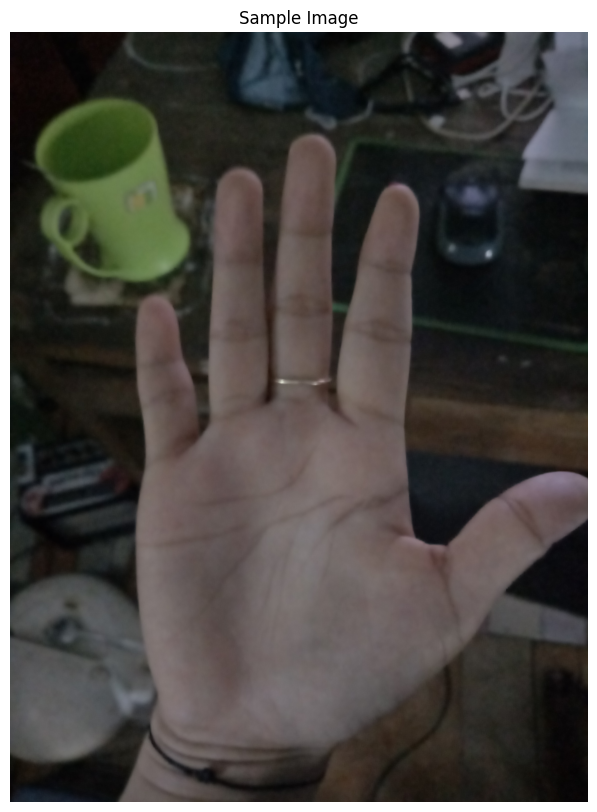

In [212]:
# Reading the sample image on which we will perform the detection
sample_img = cv2.imread('tangan 1.jpg')
# sample_img = cv2.imread('coba2.png')
sample_img = cv2.flip(sample_img, 1)

# Here we are specifing the size of the figure i.e. 10 -height; 10- width.
plt.figure(figsize = [10, 10])

# Here we will display the sample image as the output.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [213]:
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
tangan =  results.multi_handedness[0].classification[0].label
# print('Handedness:', results.multi_handedness[0].classification[0].label)


if results.multi_hand_landmarks:
    if len(results.multi_handedness) == 2:
        print("terlalu banyak tangan")
    else :
        tangan =  results.multi_handedness[0].classification[0].label
    #     print(tangan)

        thumb = None
        pinky = None

        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            thumb = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x
            pinky = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x
            #print(hand_landmarks)
            #print(f'HAND NUMBER: {hand_no+1}')
            #print('-----------------------')

            for i in range(3):
                print("")
                #print(f'{mp_hands.HandLandmark(i).name}:')
                #print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}') 
        if(tangan == 'Left'):
            print("ini tangan kiri")
            cek_tapak_tangan = thumb > pinky
            if(cek_tapak_tangan == False):
                print("bukan tapak tangan")

        if(tangan == 'Right'):
            print("ini tangan kanan")
            cek_tapak_tangan = thumb > pinky
            if(cek_tapak_tangan == True):
                print("bukan tapak tangan")
    
else :
    print("tiada telapak tangan terdeteksi")




ini tangan kiri


In [214]:
# image_height, image_width, _ = sample_img.shape

# if results.multi_hand_landmarks:
    
#     for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            
#         print(f'HAND NUMBER: {hand_no+1}')
#         print('-----------------------')
        
#         for i in range(2):

#             print(f'{mp_hands.HandLandmark(i).name}:') 
#             print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
#             print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
#             print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}\n')

In [215]:
# img_copy = sample_img.copy()

# if results.multi_hand_landmarks:
# #     print(results.multi_hand_landmarks)
#     for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
#         mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
#                                   connections = mp_hands.HAND_CONNECTIONS)
       
#     fig = plt.figure(figsize = [50, 50])
 
#     plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()
    
#     for i in results.multi_handedness:
               
#         # Return whether it is Right or Left Hand
#         label = MessageToDict(i)[
#             'classification'][0]['label']

#         if label == 'Left':

#             print("Ini telapak tangan kiri")

#         if label == 'Right':

#             print("Ini telapak tangan kanan")

In [238]:
def makeCircle(img,circle_y,circle_x,radius):
    image_height, image_width, _ = img.shape
    y = int(circle_y * image_height)
    x = int(circle_x * image_width)
    circle_coordinates = (x,y)
    color = (255, 0, 0)
    thickness = 2
    return cv2.circle(img,circle_coordinates,radius,color,thickness)

# For static images:
IMAGE_FILES = [
   'tanganriska.jpg',
]

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    width = 350
    height = 450
    dim = (width, height)
#     image = utils.remove_bground(image)


#     # resize image's height 600 fixing the ratio
#     image = utils.ResizeWithAspectRatio(image,height=600)
#     image = image.resize((200,400))
#     image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print("results:",results)
#     Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    circle_coordinates = None
    for hand_landmarks in results.multi_hand_landmarks:
        print('hand_landmarks:', hand_landmarks)
#         print(
#           f'Index finger tip coordinates: (',
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
#         )
        shape = image.shape

        circle_coordinates = [
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x
            int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * shape[0]),
        ],
        ]

        for (circle_y,circle_x) in circle_coordinates:
          annotated_image = makeCircle(annotated_image,circle_y,circle_x,10)

        palm_center_y = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y)/2
        palm_center_x = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x)/2
        #
        palm_range = 100

        # annotated_image = makeCircle(annotated_image, palm_center_y,palm_center_x,palm_range)


        mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        hand_landmark_x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
        hand_landmark_y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height

    print(circle_coordinates)
    
    img = cv2.imread("tanganriska.jpg")
    pts = np.array(circle_coordinates)

    ## (1) Crop the bounding rect
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = img[y:y+h, x:x+w].copy()

    ## (2) make mask
    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    ## (4) add the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg+ dst


    cv2.imwrite("croped.png", croped)
    cv2.imwrite("mask.png", mask)
    cv2.imwrite("dst.png", dst)
    cv2.imwrite("dst2.png", dst2)
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
#     plt.title("Sample Image");plt.axis('off');plt.imshow("img" + str(idx),cv2.flip(annotated_image,1));plt.show()
    cv2.imshow("img" + str(idx),cv2.flip(annotated_image,1))
    cv2.waitKey(0)


results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Handedness: [classification {
  index: 0
  score: 0.9748003482818604
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.43902820348739624
  y: 0.9516239166259766
  z: 1.383777089358773e-06
}
landmark {
  x: 0.6575500965118408
  y: 0.9087178707122803
  z: -0.11592467129230499
}
landmark {
  x: 0.8067123889923096
  y: 0.7482249736785889
  z: -0.13142254948616028
}
landmark {
  x: 0.8686854839324951
  y: 0.5977692008018494
  z: -0.13161367177963257
}
landmark {
  x: 0.9447418451309204
  y: 0.4949580132961273
  z: -0.1240127831697464
}
landmark {
  x: 0.7013925909996033
  y: 0.5200309157371521
  z: -0.015928318724036217
}
landmark {
  x: 0.7293973565101624
  y: 0.3526379466056824
  z: -0.04085464030504227
}
landmark {
  x: 0.7318845987319946
  y: 0.2529311776161194
  z: -0.07440101355314255
}
landmark {
  x: 0.7320671081542969
  y: 0.17101800441741943
  z: -0.10178399831056595
}
landmark {
  x: 0.5580318570137024
  y: 0.4

In [223]:
import cv2
import numpy as np
 
original = cv2.imread("croped.png")
img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2.imwrite("grey.png", img)

img = cv2.equalizeHist(img)
cv2.imwrite("equalize.png", img)

img = cv2.GaussianBlur(img, (9, 9), 0)
cv2.imwrite("blur.png", img)

img = cv2.Canny(img, 30, 80)
cv2.imwrite("canny.png", img)

lined = np.copy(original) * 0
lines = cv2.HoughLinesP(img, 1, np.pi / 180, 15, np.array([]), 50, 20)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(lined, (x1, y1), (x2, y2), (0, 0, 255))
cv2.imwrite("lined.png", img)

output = cv2.addWeighted(original, 0.8, lined, 1, 0)
cv2.imwrite("output.png", img)
image = cv2.imread("output.png")
image = ~image
cv2.imwrite("img_inv.png",image)

True

In [239]:
import cv2
image = cv2.imread("dst.png")
width = 350
height = 450
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("palm",image) #to view the palm in python
cv2.waitKey(0)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,40,55,apertureSize = 3)
cv2.imshow("edges in palm",edges)
cv2.waitKey(0)
edges = cv2.bitwise_not(edges)
cv2.imshow("edges in palm",edges)
cv2.waitKey(0)

-1